In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from matplotlib.colors import ListedColormap
import numpy as np

In [3]:
# Data from:
# https://www.iucnredlist.org/resources/spatial-data-download

In [5]:
gdf = gpd.read_file("3. Mammals Marine and Terrestrial.zip")
print(gdf.crs)
print(len(gdf))
gdf.head()

EPSG:4326
52


,id_no,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,subspecies,subpop,...,order_,family,genus,category,marine,terrestria,freshwater,SHAPE_Leng,SHAPE_Area,geometry
0,899,Vulpes lagopus,1,1,1,IUCN,2014,IUCN (International Union for Conservation of ...,None,None,...,CARNIVORA,CANIDAE,Vulpes,LC,true,true,false,81.906760,15.579920,"POLYGON ((20.2837 78.9906, 20.31459 78.98885, ..."
1,899,Vulpes lagopus,1,1,1,IUCN,2014,IUCN (International Union for Conservation of ...,None,None,...,CARNIVORA,CANIDAE,Vulpes,LC,true,true,false,88.518091,19.461579,"POLYGON ((-14.95012 66.22779, -14.93852 66.220..."
2,899,Vulpes lagopus,1,1,1,IUCN,2014,IUCN (International Union for Conservation of ...,None,None,...,CARNIVORA,CANIDAE,Vulpes,LC,true,true,false,2.604464,0.095247,"POLYGON ((-8.13727 71.14619, -8.09449 71.14722..."
3,899,Vulpes lagopus,1,1,1,IUCN,2014,IUCN (International Union for Conservation of ...,None,None,...,CARNIVORA,CANIDAE,Vulpes,LC,true,true,false,0.703907,0.013471,"POLYGON ((-169.57866 56.53476, -169.6366 56.53..."
4,899,Vulpes lagopus,1,1,1,IUCN,2014,IUCN (International Union for Conservation of ...,None,None,...,CARNIVORA,CANIDAE,Vulpes,LC,true,true,false,0.913275,0.017345,"POLYGON ((-170.28905 57.10305, -170.29723 57.1..."


<Axes: >

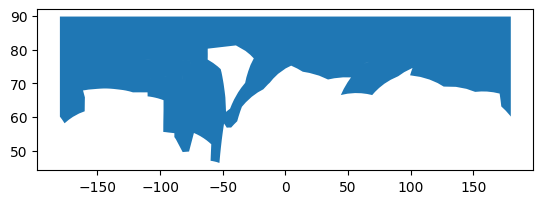

In [6]:
gdf.sample(1).plot()

<Axes: >

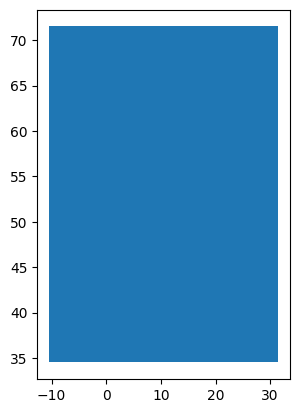

In [7]:
europe_box = (-10.5, 34.5, 31.5, 71.5)
minx, miny, maxx, maxy = europe_box
box_gdf = gpd.GeoDataFrame(geometry=[box(minx, miny, maxx, maxy)], crs="EPSG:4326")
box_gdf.plot()

In [8]:
gdf_europe = gpd.clip(gdf, box_gdf)
len(gdf_europe)

7

<Axes: >

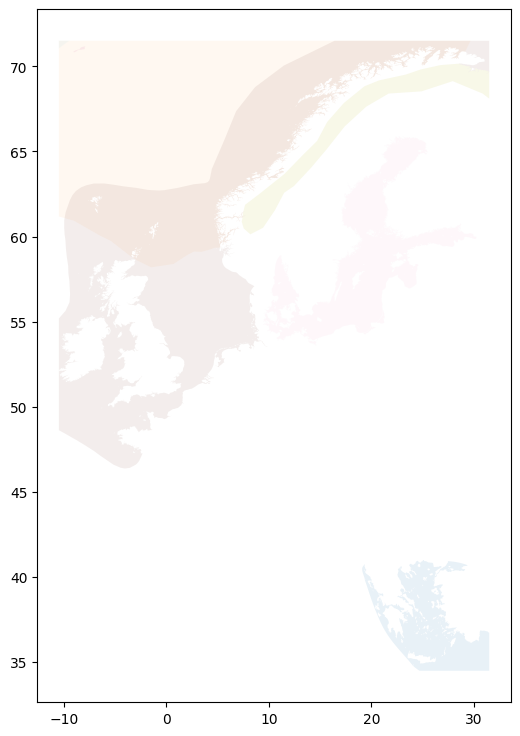

In [11]:
f, ax = plt.subplots(1,1,figsize=(14,9))

gdf_europe.plot(cmap = "tab20", alpha = 0.1, linewidth = 2, ax = ax)

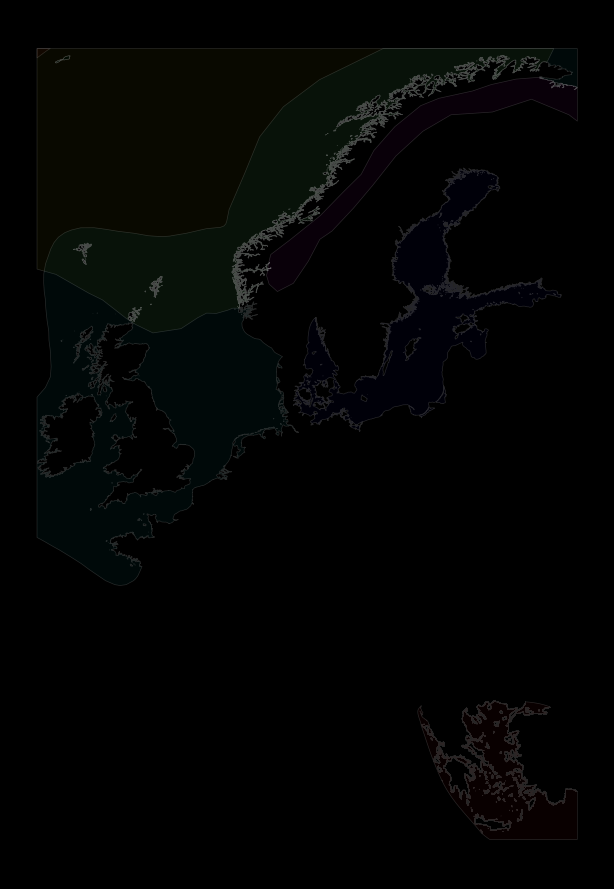

In [17]:
fig, ax = plt.subplots(figsize=(14,9), facecolor='black')

colors = plt.cm.hsv(np.linspace(0, 1, 256))
neon_cmap = ListedColormap(colors)

gdf_europe.plot(
    ax=ax,
    cmap=neon_cmap,
    alpha=0.04,
    linewidth=0.0
)

gdf_europe.plot(
    ax=ax,
    facecolor='none',
    edgecolor='white',
    alpha=0.15,
    linewidth=0.5
)

ax.set_axis_off()
ax.set_facecolor('black')
fig.patch.set_facecolor('black')

plt.tight_layout()
plt.show()

In [20]:
import geopandas as gpd
import folium
import numpy as np
from matplotlib import cm, colors

m = folium.Map(
    location=[54, 15],
    zoom_start=4,
    tiles='CartoDB dark_matter'
)